# <center>Cirugía de Hígado y Sobrevivencia<center>
## <center>Carlos Adrián Palmieri Álvarez A01635776<center>

In [316]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [317]:
df = pd.read_excel('../data/raw/Datos Modelos Lineales.xlsx', sheet_name='Regresión Lineal Múltiple Ej')
df

,Factor Coagulación,Índice pronóstico,Función de enzima,Función de hígado,Edad,Género,Alcohol\n(moderado),Alcohol\n(severo),Sobrevivencia\n(días),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,6.7,62,81,2.59,50,0,1,0,695,NaN,NaN,"Género: 0 = Mujer, 1 = Hombre"
1,5.1,59,66,1.70,39,0,0,0,403,NaN,NaN,"Alcohol (Moderado): 0 = No, 1 = Sí"
2,7.4,57,83,2.16,55,0,0,0,710,NaN,NaN,"Alcohol (Severo): 0 = No, 1 = Sí"
3,6.5,73,41,2.01,48,0,0,0,349,NaN,NaN,NaN
4,7.8,65,115,4.30,45,0,0,1,2343,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
103,5.8,70,64,2.52,49,0,1,0,589,NaN,NaN,NaN
104,5.4,64,81,1.36,62,0,1,0,599,NaN,NaN,NaN
105,6.9,90,33,2.78,48,1,0,0,655,NaN,NaN,NaN
106,7.9,45,55,2.46,43,0,1,0,377,NaN,NaN,NaN


In [318]:
# Guardando las columnas hasta la 9
df = df.iloc[:, :9]
df 

,Factor Coagulación,Índice pronóstico,Función de enzima,Función de hígado,Edad,Género,Alcohol\n(moderado),Alcohol\n(severo),Sobrevivencia\n(días)
0,6.7,62,81,2.59,50,0,1,0,695
1,5.1,59,66,1.70,39,0,0,0,403
2,7.4,57,83,2.16,55,0,0,0,710
3,6.5,73,41,2.01,48,0,0,0,349
4,7.8,65,115,4.30,45,0,0,1,2343
...,...,...,...,...,...,...,...,...,...
103,5.8,70,64,2.52,49,0,1,0,589
104,5.4,64,81,1.36,62,0,1,0,599
105,6.9,90,33,2.78,48,1,0,0,655
106,7.9,45,55,2.46,43,0,1,0,377


In [319]:
# Renombrando las columnas
df.columns = ['FactorCoagulacion', 'Indicepronostico', 'Funciondeenzima', 'Funciondehigado', 'Edad', 'Genero', 'Alcoholmoderado', 'Alcoholsevero', 'Y']

### Realizar las transformaciones adecuadas a las variables predictoras.

In [320]:
# Normalización de la columna 0 hasta la 4
df_norm = (df.iloc[:, :5] - df.iloc[:, :5].mean()) / df.iloc[:, :5].std()
df_norm

# Concatenar
df = pd.concat([df_norm, df.iloc[:, 5:]], axis=1)
df

,FactorCoagulacion,Indicepronostico,Funciondeenzima,Funciondehigado,Edad,Genero,Alcoholmoderado,Alcoholsevero,Y
0,0.574980,-0.047381,0.436295,-0.067860,-0.007200,0,1,0,695
1,-0.547692,-0.225888,-0.280538,-0.952900,-0.957579,0,0,0,403
2,1.066149,-0.344893,0.531873,-0.495464,0.424791,0,0,0,710
3,0.434646,0.607144,-1.475261,-0.644628,-0.179996,0,0,0,349
4,1.346816,0.131125,2.061117,1.632609,-0.439191,0,0,1,2343
...,...,...,...,...,...,...,...,...,...
103,-0.056523,0.428637,-0.376116,-0.137470,-0.093598,0,1,0,589
104,-0.337191,0.071623,0.436295,-1.291005,1.029578,0,1,0,599
105,0.715314,1.618683,-1.857572,0.121081,-0.179996,1,0,0,655
106,1.416983,-1.058921,-0.806216,-0.197136,-0.611987,0,1,0,377


### Realizar el modelo de regresión con las variables significativas.

In [321]:
# Generando un método de selección de variables por mejores subconjuntos

def Lin_mod(X, y):
    model = LinearRegression()
    model.fit(X, y)


    print('Coeficientes:', model.coef_)
    print('Intercepto:', model.intercept_)
    print('R2:', model.score(X, y))
    print("R2 ajustado:", 1 - (1 - model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1))
    print('MSE:', mean_squared_error(y, model.predict(X)))

    return model



In [322]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


model = Lin_mod(X, y)


Coeficientes: [ 75.1133063  136.33833532 186.17973677  76.29655158   7.41883078
  13.09258075 -41.26764482 195.70703222]
Intercepto: 634.79683878867
R2: 0.775278095890658
R2 ajustado: 0.7571187501040445
MSE: 26938.257179330707


### Probar si se deben agregar interacciones o términos polinomiales.

In [323]:
# Agregando las columnas al cuadrado y al cubo
X = pd.concat([X, X ** 2, X ** 3], axis=1)
X, X.shape

(     FactorCoagulacion  Indicepronostico  Funciondeenzima  Funciondehigado  \
 0             0.574980         -0.047381         0.436295        -0.067860   
 1            -0.547692         -0.225888        -0.280538        -0.952900   
 2             1.066149         -0.344893         0.531873        -0.495464   
 3             0.434646          0.607144        -1.475261        -0.644628   
 4             1.346816          0.131125         2.061117         1.632609   
 ..                 ...               ...              ...              ...   
 103          -0.056523          0.428637        -0.376116        -0.137470   
 104          -0.337191          0.071623         0.436295        -1.291005   
 105           0.715314          1.618683        -1.857572         0.121081   
 106           1.416983         -1.058921        -0.806216        -0.197136   
 107          -0.968694          0.309632        -0.567272        -0.584962   
 
          Edad  Genero  Alcoholmoderado  Alcoholse

In [324]:
model = Lin_mod(X, y)

Coeficientes: [ 59.33928165  70.22047011 145.886364    55.58751386  20.58913091
  11.17178384  -5.58364945  68.47491038  24.84812236   4.45488809
  51.51055459  -8.5120798   -7.57363431  11.17178384  -5.58364945
  68.47491038   0.52345924  19.10654639  21.75766406   3.60186472
  -9.7059275   11.17178384  -5.58364945  68.47491038]
Intercepto: 551.6173295683336
R2: 0.8245222911657613
R2 ajustado: 0.7737817488522465
MSE: 21035.17086396887


Se puede observar que al agregar más variables, en este caso el cuadrado y el cubo de de las variables, provoca que aumente la R2, sin embargo, el R2 ajustado disminuye, esto quiere decir que no necesariamente el generar un modelo con las variables modificadas pueda provocar que el modelo se comporte mejor.

In [325]:
# Agregando el producto de pares de variables cada dos
for i in range(9):
    for j in range(i + 1, 9):
        X[f'X{i}X{j}'] = X.iloc[:, i] * X.iloc[:, j]

X

,FactorCoagulacion,Indicepronostico,Funciondeenzima,Funciondehigado,Edad,Genero,Alcoholmoderado,Alcoholsevero,FactorCoagulacion,Indicepronostico,...,X4X5,X4X6,X4X7,X4X8,X5X6,X5X7,X5X8,X6X7,X6X8,X7X8
0,0.574980,-0.047381,0.436295,-0.067860,-0.007200,0,1,0,0.330601,0.002245,...,-0.000000,-0.007200,-0.000000,-0.002380,0,0,0.000000,0,0.330601,0.000000
1,-0.547692,-0.225888,-0.280538,-0.952900,-0.957579,0,0,0,0.299967,0.051026,...,-0.000000,-0.000000,-0.000000,-0.287242,0,0,0.000000,0,0.000000,0.000000
2,1.066149,-0.344893,0.531873,-0.495464,0.424791,0,0,0,1.136673,0.118951,...,0.000000,0.000000,0.000000,0.482848,0,0,0.000000,0,0.000000,0.000000
3,0.434646,0.607144,-1.475261,-0.644628,-0.179996,0,0,0,0.188917,0.368624,...,-0.000000,-0.000000,-0.000000,-0.034004,0,0,0.000000,0,0.000000,0.000000
4,1.346816,0.131125,2.061117,1.632609,-0.439191,0,0,1,1.813915,0.017194,...,-0.000000,-0.000000,-0.439191,-0.796654,0,0,0.000000,0,0.000000,1.813915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-0.056523,0.428637,-0.376116,-0.137470,-0.093598,0,1,0,0.003195,0.183730,...,-0.000000,-0.093598,-0.000000,-0.000299,0,0,0.000000,0,0.003195,0.000000
104,-0.337191,0.071623,0.436295,-1.291005,1.029578,0,1,0,0.113698,0.005130,...,0.000000,1.029578,0.000000,0.117061,0,0,0.000000,0,0.113698,0.000000
105,0.715314,1.618683,-1.857572,0.121081,-0.179996,1,0,0,0.511673,2.620134,...,-0.179996,-0.000000,-0.000000,-0.092099,0,0,0.511673,0,0.000000,0.000000
106,1.416983,-1.058921,-0.806216,-0.197136,-0.611987,0,1,0,2.007842,1.121313,...,-0.000000,-0.611987,-0.000000,-1.228773,0,0,0.000000,0,2.007842,0.000000


In [326]:
model = Lin_mod(X, y)

Coeficientes: [ 1.08940100e+01  1.31386367e+02  1.93837825e+02 -1.52720056e+01
  8.76520374e+01 -1.21778193e+14  4.19685346e+14 -1.44078991e+14
 -2.57882179e+01 -1.27984335e+01  8.13002070e+01 -1.85269247e+01
  1.49884094e+00 -1.51879706e+13 -2.06138130e+14  1.01819302e+14
 -1.43506981e+14  6.99724948e+00  6.66695827e+00  6.43111354e+00
 -2.60324030e+01  1.36966163e+14 -2.13547216e+14  4.22596889e+13
 -1.84407635e+01  5.96132080e+01 -1.97336963e+01  1.97909601e+00
 -5.42467800e+01  8.56505614e+01  2.40126593e+02  1.43506981e+14
 -1.01209885e+01  7.57812500e+01  1.06250000e+00 -1.95781250e+01
  2.90625000e+01 -1.35937500e+01  6.06250000e+00 -1.94843750e+01
 -1.73593750e+01 -9.02500000e+01  1.96718750e+01  1.08890625e+02
  1.83789062e+01  4.48984375e+01  5.61240234e+01  3.35625000e+01
  4.82812500e+00 -3.33125000e+01  6.26562500e+00  2.81250000e-01
 -2.20312500e+01 -1.99687500e+01  5.71250000e+01  1.03031250e+02
  2.11250000e+01  0.00000000e+00  6.07343750e+01  4.65000000e+01]
Intercepto

En este caso se aumenta mucho la R2 debido a que aumentamos considerablemente las variables, sin embargo, el R2 ajustado no disminuyó en comparación al dataset sin modificar, al contrario, aumento. Por lo que podría ser una opción a evaluar el utilizar el producto de variables.

### Interpretar la tabla ANOVA, R2, R2 ajustada, p-values y FIV.

In [327]:
X = X.dropna()
y = y.dropna()

X.shape, y.shape

((108, 60), (108,))

In [328]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Función para realizar ANOVA en cada característica
def anova_feature(df, feature_name):
    model = smf.ols(f'target ~ {feature_name}', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table


In [329]:
def calculate_vif_sklearn(df):
    vif_data = pd.DataFrame()
    vif_data["variable"] = df.columns
    vif_data["VIF"] = [calculate_vif_for_variable(df, i) for i in range(df.shape[1])]
    return vif_data

In [330]:
def calculate_vif_for_variable(df, index):
    # Definir variable dependiente y predictora
    y = df.iloc[:, index]
    X = df.drop(df.columns[index], axis=1)
    
    # Añadir constante
    X = sm.add_constant(X)
    
    # Ajustar modelo de regresión
    model = sm.OLS(y, X).fit()
    
    # Calcular R^2
    r_squared = model.rsquared
    
    # Calcular VIF
    vif = 1 / (1 - r_squared)
    return vif

In [331]:
# Aplicar la función a cada característica
# Crear un DataFrame

df['target'] = y

results = {}
for feature in df.columns[:-1]:  # Excluir la columna de la variable objetivo
    results[feature] = anova_feature(df, feature)
    print(f'ANOVA for {feature}:')
    print(results)
    print('\n')




ANOVA for FactorCoagulacion:
{'FactorCoagulacion':                          sum_sq     df         F    PR(>F)
FactorCoagulacion  1.014269e+06    1.0  9.010361  0.003348
Residual           1.193210e+07  106.0       NaN       NaN}


ANOVA for Indicepronostico:
{'FactorCoagulacion':                          sum_sq     df         F    PR(>F)
FactorCoagulacion  1.014269e+06    1.0  9.010361  0.003348
Residual           1.193210e+07  106.0       NaN       NaN, 'Indicepronostico':                         sum_sq     df          F    PR(>F)
Indicepronostico  2.613505e+06    1.0  26.810725  0.000001
Residual          1.033286e+07  106.0        NaN       NaN}


ANOVA for Funciondeenzima:
{'FactorCoagulacion':                          sum_sq     df         F    PR(>F)
FactorCoagulacion  1.014269e+06    1.0  9.010361  0.003348
Residual           1.193210e+07  106.0       NaN       NaN, 'Indicepronostico':                         sum_sq     df          F    PR(>F)
Indicepronostico  2.613505e+06    1

Gracias a esta tabla Anova nos podemos dar cuenta que las variables Función de Higado, Función de Enzima, Índice pronostico y factor de Coagulación tienen un efecto significativo ante la variable objetivo dado a que cuentan con un P-VALUE menor a 0.05

Y la característica de Edad, Género, AlcoholModerado y AlcoholSevero podrían no ser tan significativo ante el modelo. A pesar, de que son variables a considerar.



In [332]:
# Calcular el VIF usando la versión sklearn
df_no_target = df.drop(columns=['target', 'Y'])
vif = calculate_vif_sklearn(df_no_target)
print("VIF values:")
print(vif)

VIF values:
            variable       VIF
0  FactorCoagulacion  1.577947
1   Indicepronostico  1.323686
2    Funciondeenzima  1.629249
3    Funciondehigado  2.401849
4               Edad  1.020800
5             Genero  1.068036
6    Alcoholmoderado  1.363438
7      Alcoholsevero  1.444596


En este caso ninguna variable cuenta con un VIF menor a 1 lo cuál significa que que no hay problemas de multicolninealidad en el modelo.

Para todas las variables en el modelo cuantan con un VIF menor a 5 y mayor a 1 esto quiere decir que no son idealies pero no pueden llegar a invlucrac algún problema en el modelo. Función de Enzima podría ser la que podría ser la más conflictiva en el modelo.

En este caso se podría generar alguna clase de modificación/transformación de los datos o elegir las variables que podrían ser mejores para el modelo. Se podría implementar una regularización de Ridge la cual nos puede decir qué variables convergen mejor en el modelo y cuáles serían las más significativas.

### Verificar el cumplimiento de los supuestos.

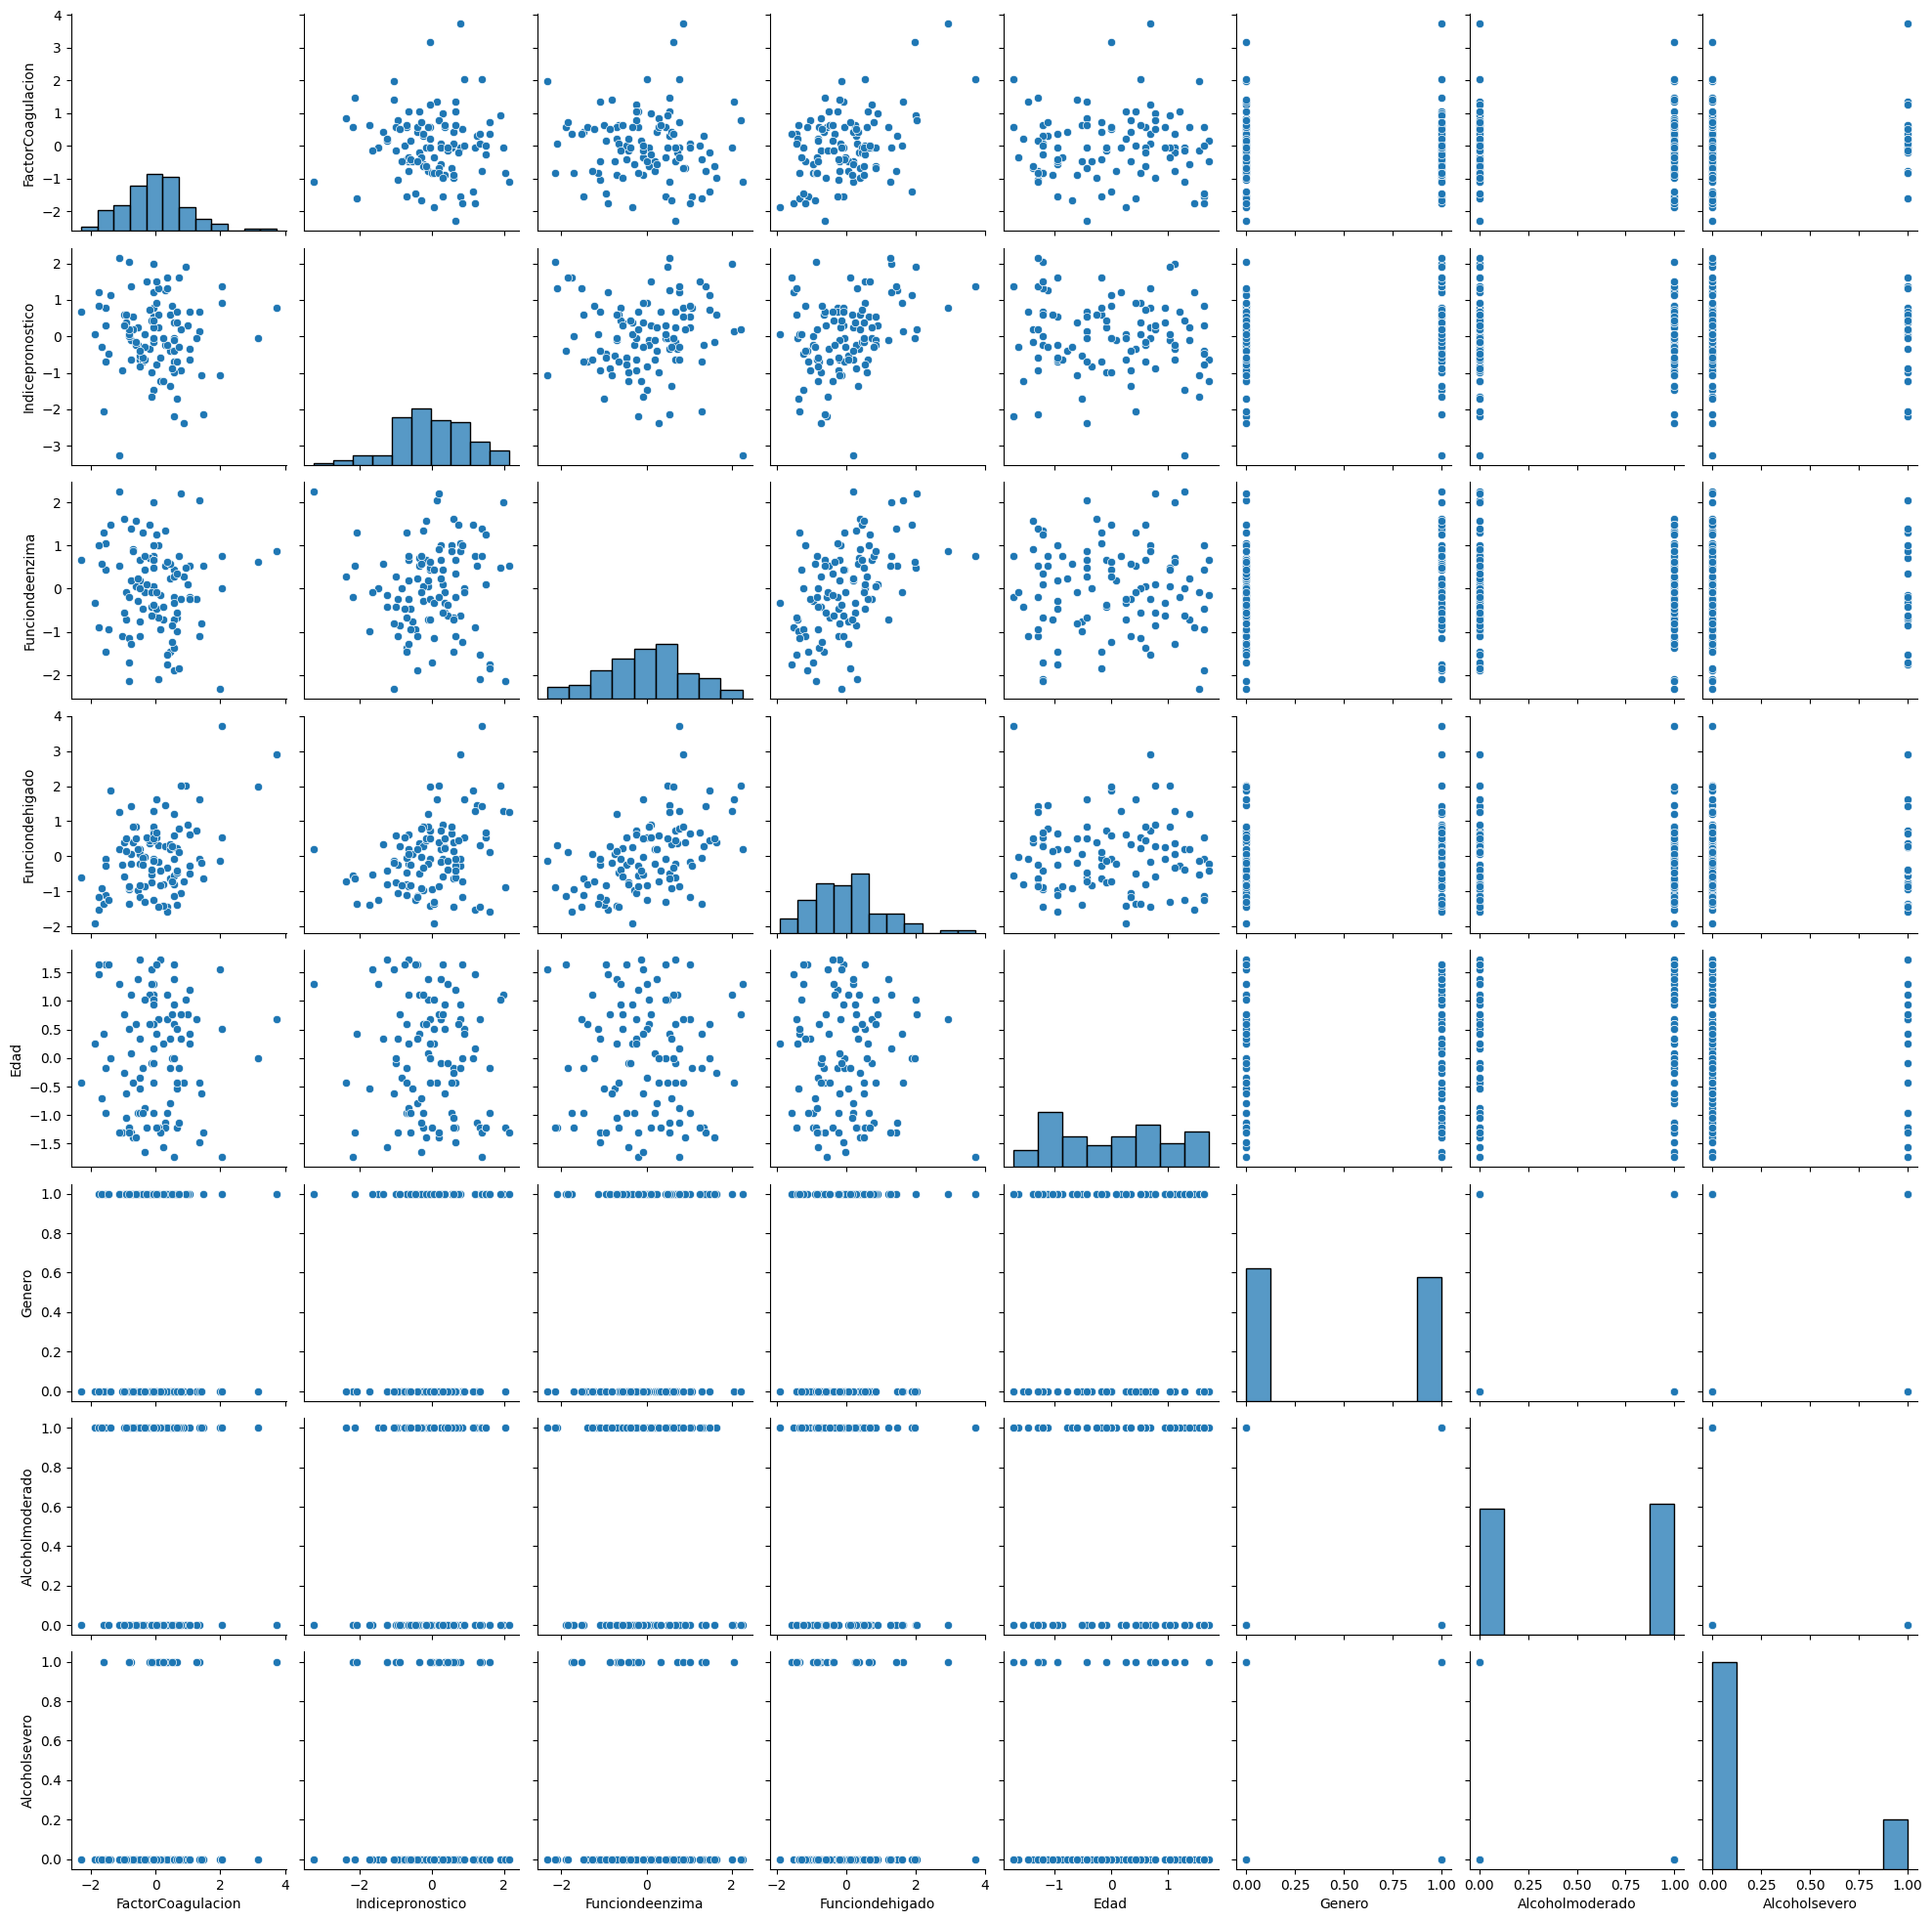

In [333]:
# Verificando el cumplimiento de supuestos: Linealidad, Normalidad, Homocedasticidad
import matplotlib.pyplot as plt
import seaborn as sns

# Linealidad
sns.pairplot(df_no_target)
plt.show()

No cumplen supuesto de linealidad

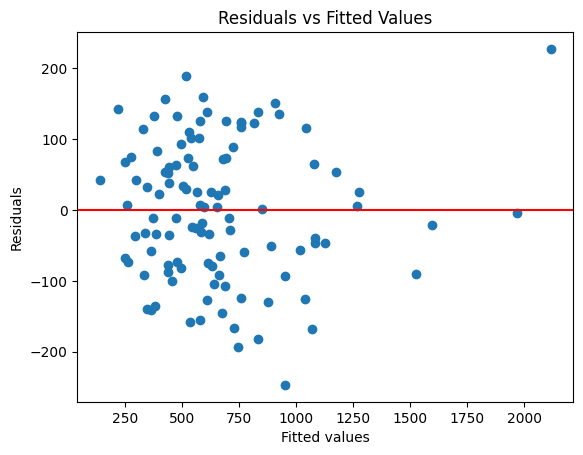

In [336]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ajustar el modelo
model = LinearRegression().fit(X, y)

# Predecir valores
y_pred = model.predict(X)

# Calcular residuos
residuals = y - y_pred

# Graficar residuos
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red')
plt.title('Residuals vs Fitted Values')
plt.show()


Se podría decir que sí cumple el supuesto de variabilidad constante

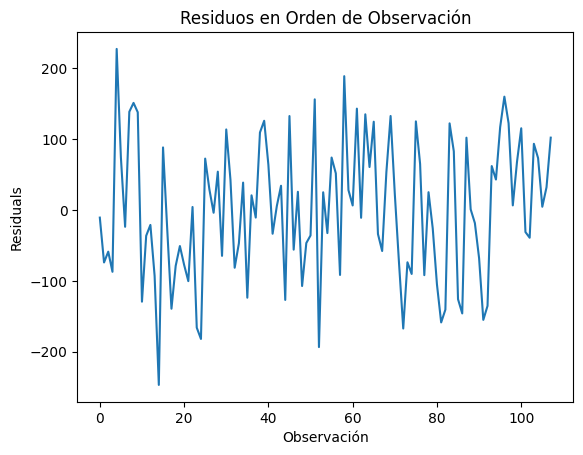

In [339]:
import matplotlib.pyplot as plt

# Suponiendo que `residuals` ya está calculado como en los ejemplos anteriores
# y `y_pred` son las predicciones del modelo.

# Crear un gráfico de residuos en orden temporal
plt.plot(residuals)
plt.xlabel('Observación')
plt.ylabel('Residuals')
plt.title('Residuos en Orden de Observación')
plt.show()


Sí cumple el supuesto